In [1]:
import os
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from tqdm import tqdm
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import operator

In [2]:
resnet50 = models.resnet101(pretrained=True)
modules=list(resnet50.children())[:-2]
resnet50=nn.Sequential(*modules)

In [3]:
resnet50

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [4]:
scaler = transforms.Resize((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

In [5]:
images_feature = {}
path = "Cool_Shirt_Day_Tee"
images = os.listdir(path)
for i in tqdm(images):
    image = Image.open(os.path.join(path, i))
    tensor_image = normalize(to_tensor(scaler(image))).unsqueeze(0)
    output = resnet50(tensor_image).squeeze().view(-1, 2048 * 7 * 7)
    images_feature[i] = output

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:49<00:00,  1.21it/s]


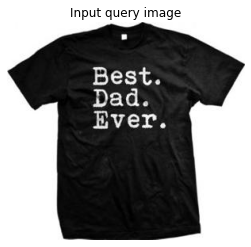

In [6]:
input_image = Image.open("query_image\img_00000002.jpg")
input_tensor = normalize(to_tensor(scaler(input_image))).unsqueeze(0)
input_feature = resnet50(input_tensor).squeeze().view(-1, 2048 * 7 * 7)
plt.title('Input query image')
plt.axis('off')
plt.imshow(np.asarray(input_image))

In [7]:
cosine = nn.CosineSimilarity(dim=1)

In [8]:
similarity_results = {}
for image_name, feature_tensor in images_feature.items():
    similarity = cosine(input_feature, feature_tensor)
    similarity_results[image_name] = similarity.item()

In [9]:
similarity_results

{'img_00000001.jpg': 0.4366055130958557,
 'img_00000003.jpg': 0.4694346785545349,
 'img_00000004.jpg': 0.43053171038627625,
 'img_00000005.jpg': 0.44568559527397156,
 'img_00000006.jpg': 0.4701637327671051,
 'img_00000007.jpg': 0.46244728565216064,
 'img_00000008.jpg': 0.48520252108573914,
 'img_00000009.jpg': 0.4516068398952484,
 'img_00000010.jpg': 0.5203007459640503,
 'img_00000011.jpg': 0.4644644260406494,
 'img_00000012.jpg': 0.4028942883014679,
 'img_00000013.jpg': 0.44049471616744995,
 'img_00000014.jpg': 0.4895135760307312,
 'img_00000015.jpg': 0.399269700050354,
 'img_00000016.jpg': 0.45441150665283203,
 'img_00000017.jpg': 0.41724926233291626,
 'img_00000018.jpg': 0.45124831795692444,
 'img_00000019.jpg': 0.4032292068004608,
 'img_00000020.jpg': 0.45230719447135925,
 'img_00000021.jpg': 0.5133252739906311,
 'img_00000022.jpg': 0.4606628119945526,
 'img_00000023.jpg': 0.47852903604507446,
 'img_00000024.jpg': 0.5186033844947815,
 'img_00000025.jpg': 0.48212939500808716,
 'img_

In [10]:
sorted_results= dict(sorted(similarity_results.items(), reverse=True, key=operator.itemgetter(1)))
output = (list(sorted_results.keys())[0: 10])  

In [11]:
output

['img_00000045.jpg',
 'img_00000034.jpg',
 'img_00000044.jpg',
 'img_00000038.jpg',
 'img_00000010.jpg',
 'img_00000024.jpg',
 'img_00000021.jpg',
 'img_00000056.jpg',
 'img_00000058.jpg',
 'img_00000014.jpg']

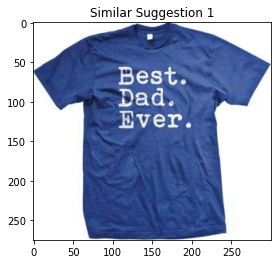

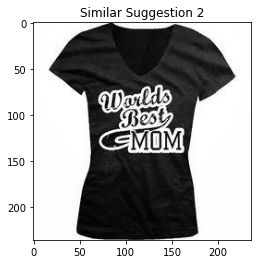

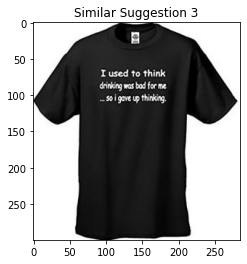

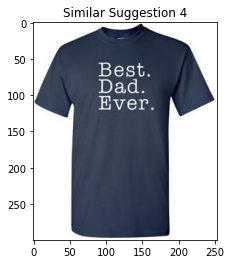

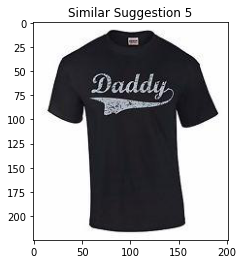

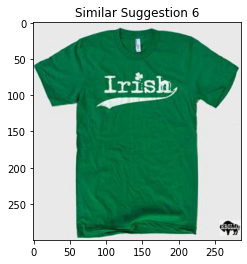

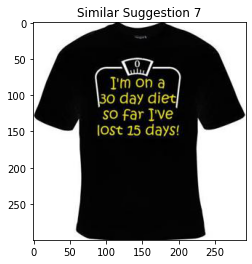

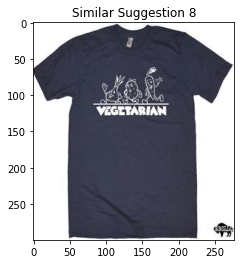

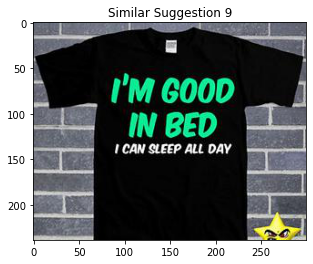

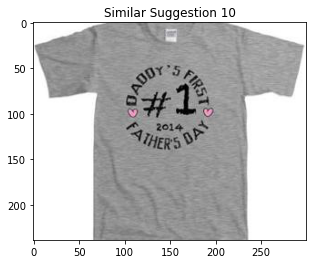

In [12]:
path = "Cool_Shirt_Day_Tee"
j = 1
for i in output:
    img = plt.imread(os.path.join(path, i))
    plt.title(f'Similar Suggestion {j}')
    plt.imshow(img)
    img = Image.fromarray(img)
    img.save(f"Suggestions\suggestion {j}.jpg")
    j+=1
    plt.show()